In [1]:
import cv2
import pandas as pd

In [2]:
import glob
import os
import numpy as np
import sys


In [3]:
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

In [4]:

options={
    'model':'cfg/tiny-yolo-voc-text.cfg',
    'load':13500,
    'threshold': 0
#     'gpu':1.0
}
tfnet=TFNet(options)

Parsing cfg/tiny-yolo-voc-text.cfg
Loading None ...
Finished in 5.459785461425781e-05s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | 

In [5]:
img=cv2.imread(r'positive77.jpg',cv2.IMREAD_COLOR)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
running=tfnet.return_predict(img)

In [6]:
result=running
result

[{'label': 'Building',
  'confidence': 0.5887517,
  'topleft': {'x': 0, 'y': 11},
  'bottomright': {'x': 299, 'y': 289}},
 {'label': 'Graffiti',
  'confidence': 0.62014186,
  'topleft': {'x': 83, 'y': 33},
  'bottomright': {'x': 217, 'y': 154}},
 {'label': 'Text',
  'confidence': 0.9194934,
  'topleft': {'x': 72, 'y': 45},
  'bottomright': {'x': 232, 'y': 117}}]

In [33]:
for i in result:
    tl=(i['topleft']['x'],i['topleft']['y'])
    br=(i['bottomright']['x'],i['bottomright']['y'])
    img=cv2.rectangle(img,tl,br,(0,255,0), 1)  # rectangle(image, topleft, bottomright, color, pixel thickness)
    img = cv2.putText(img,i['label'], tl,cv2.FONT_HERSHEY_COMPLEX, .5, (255, 0, 0), lineType=cv2.LINE_AA)


The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


In [35]:
img_cropped=img[tl[1]:br[1],tl[0]:br[0]]


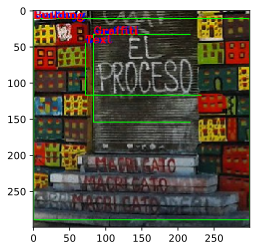

In [34]:
plt.imshow(img)
plt.show()